<a href="https://colab.research.google.com/github/weyj4/GCP_ML/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('weight-height.csv')

In [54]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [55]:
def line(x, w=0, b=0):
  return x * w + b

x = np.linspace(55, 80, 100)
yhat = line(x, w=0, b=0)

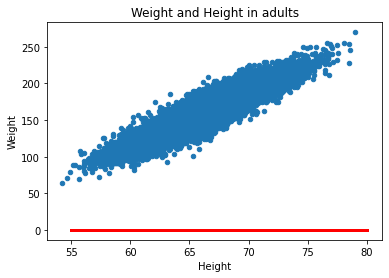

In [56]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

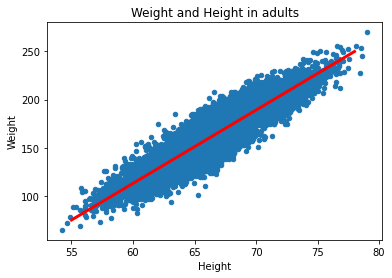

In [57]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [58]:
def mean_squared_error(y_true, y_pred):
  s = (y_true - y_pred) ** 2
  return s.mean()

In [59]:
X = df[['Height']].values
y_true = df['Weight'].values

In [60]:
y_pred = line(X)
mean_squared_error(y_true, y_pred)

27093.83757456164

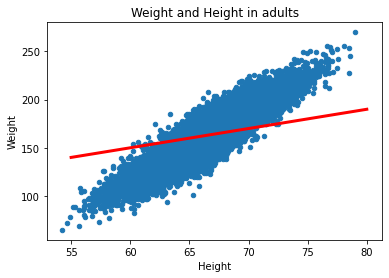

In [61]:
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height in adults')
yhat = line(x, w=2, b=30)
plt.plot(x, yhat, color='red', linewidth=3)

In [62]:
y_pred = line(X, w=2, b=30)
mean_squared_error(y_true, y_pred)

1091.7331398106144

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [65]:
model = Sequential()

In [66]:
model.add(Dense(1, input_shape=(1,)))

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [69]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 2s 3ms/step - loss: 871.8743
Epoch 2/40
313/313 [==============================] - 1s 3ms/step - loss: 573.2913
Epoch 3/40
313/313 [==============================] - 1s 2ms/step - loss: 540.0250
Epoch 4/40
313/313 [==============================] - 0s 2ms/step - loss: 465.5429
Epoch 5/40
313/313 [==============================] - 0s 2ms/step - loss: 432.5895
Epoch 6/40
313/313 [==============================] - 1s 2ms/step - loss: 382.6751
Epoch 7/40
313/313 [==============================] - 0s 2ms/step - loss: 355.0630
Epoch 8/40
313/313 [==============================] - 0s 2ms/step - loss: 317.4702
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 301.7175
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 256.8014
Epoch 11/40
313/313 [==============================] - 0s 2ms/step - loss: 251.2321
Epoch 12/40
313/313 [==============================] - 1s 2ms/step - loss: 223.9760
E

313/313 [==============================] - 1s 2ms/step


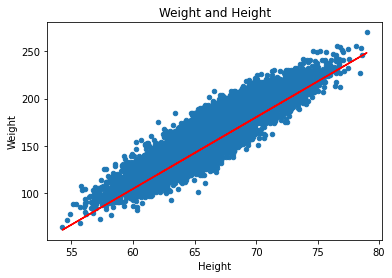

In [75]:
y_pred = model.predict(X)
df.plot(kind='scatter', x='Height', y='Weight', title='Weight and Height')
plt.plot(X, y_pred, color='red')

In [71]:
mean_squared_error(y_true, y_pred)

1948.552795862178

In [73]:
W, B = model.get_weights()
print(W, B)

[[7.5528326]] [-348.38544]


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2)

In [78]:
len(X_train)

8000

In [79]:
len(X_test)

2000

In [80]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [81]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [82]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

63/63 [==============================] - 0s 2ms/step


In [91]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [90]:
print(mse(y_train, y_train_pred))
print(mse(y_test, y_test_pred))

158.0833299003183
155.29049849598232


In [92]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8475132900998374
0.8458040726232178
